In [2]:
#conda install seaborn
#conda install numpy
#conda install pandas
#conda install matplotlib

In [4]:
import numpy as np
import pandas as pd # csv files
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

iris=pd.read_csv('iris.csv')

In [5]:
class ProcessingData:
    @staticmethod
    def stiffle(x):
        for i in range(len(x)-1,0,-1):
            tmp = random.randint(0,i)
            x.iloc[i], x.iloc[tmp] = x.iloc[tmp], x.iloc[i]
        return x
    
    @staticmethod
    def normalize(X):
        x=X.copy()
        values = x.select_dtypes(exclude="object")
        indexes = values.columns.tolist()
        
        for i in indexes:
            xmax = max(x[i])
            xmin = min(x[i])
            mnx = xmax - xmin
            for v in range(len(x[i])):
                x.at[v,i] = (x.at[v,i]-xmin)/mnx
        return x    
        #(x-min)/(max-min) - x-wartość danej kolumny
        # do zrobienia dla każdej kolumny
        
    @staticmethod
    def split(x,a):
        n = len(x)
        tabA=x[0:int(a*n)]
        tabB=x[int(a*n):n]
        return tabA, tabB
        #baza => zbior treningowy, weryfikacyjny/walidacyjny
        #n rekordów, podział 70:30; treningowy 0,7*n; walidacyjny 0,3*n
        #irisTrain, iristVal
        

In [6]:
IrisMixed=ProcessingData.stiffle(iris)

In [7]:
normalIris = ProcessingData.normalize(IrisMixed)

In [8]:
irisTrain, irisVal = ProcessingData.split(normalIris,0.7)

In [9]:
class KNN:
    @staticmethod
    def minkowskiMetric(v1,v2,m):
        dim = len(v1)-1
        distance=0
        for i in range(dim):
            distance+=(abs(v1[i]-v2[i])**m)
        distance = distance**(1/m)
        return distance
    
    @staticmethod
    def KLASTERYZACJA(testSample, x, k, classes):
        # odległość
        distances=[]
        for i in x.index:
            distances.append(KNN.minkowskiMetric(testSample,x.iloc[i],2))
        
        # sortowanie - po distances, ale zamieniamy w treningowym
        
        xs = x.copy()
        
        n=len(distances)
        
        i=0
        while(i<n):
            temp = distances[i]
            tempx=xs.iloc[i]
            ind = distances.index(min(distances[i:n]))
            distances[ind], distances[i] = distances[i], distances[ind]
            xs.iloc[i], xs.iloc[ind] = xs.iloc[ind], xs.iloc[i]
            i+=1

        #while n>1:
        #    for i in range(0,n-1,1):
        #        if distances[i+1]>distances[i]:
        #            distances[i+1], distances[i] = distances[i], distances[i+1]
        #            xs.iloc[i], xs.iloc[i+1] = xs.iloc[i+1], xs.iloc[i]
        #    n-=1
        
        # głosowanie
        for i in range(0,k,1):
            classes[xs.iloc[i].variety]+=1
            
        # zwrot wyniku
        return max(classes,key=classes.get)
        

In [10]:
for k in [2,3,4]:
    corrected=0
    for i in range(len(irisVal)):
        classes = {'Setosa':0, 'Versicolor':0, 'Virginica':0}
        final = KNN.KLASTERYZACJA(irisVal.iloc[i],irisTrain,k,classes)
        if (final == irisVal.iloc[i].variety):
            corrected+=1

    accuracy=corrected/len(irisVal)*100
    print('accuracy for k=',k,'is', accuracy)

accuracy for k= 2 is 91.11111111111111
accuracy for k= 3 is 93.33333333333333
accuracy for k= 4 is 93.33333333333333


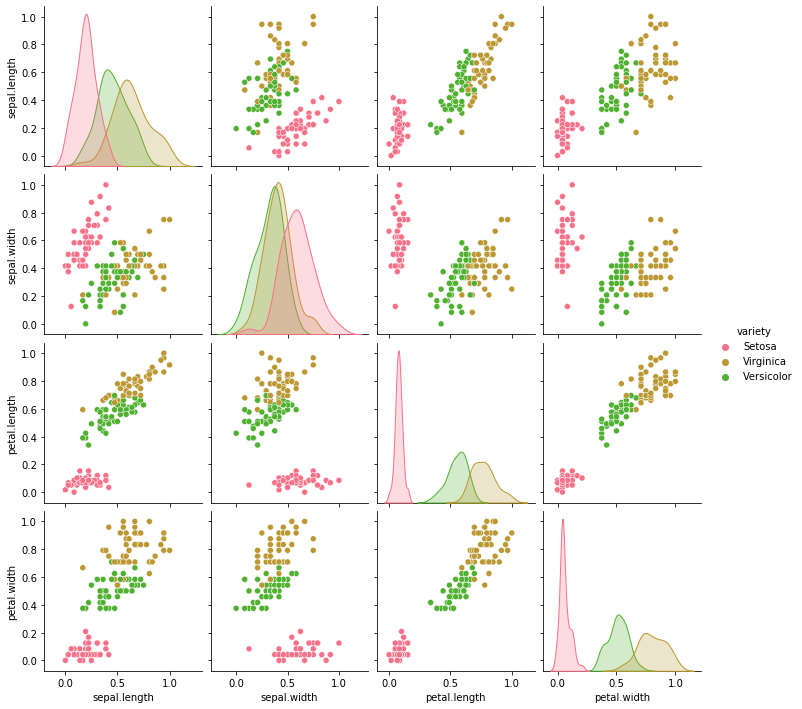

In [11]:
sns.pairplot(normalIris, hue='variety')